In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.style.use("seaborn-v0_8-dark")

**READ DATASET**

In [ ]:
pd.set_option('display.max_columns', None)

# read dataset banjir jan-dec 2020
set_banjir = pd.read_csv('/content/drive/Shareddrives/dsa_dataset_01/merge-csv.com__649c3731ccd59.csv')

# read dataset air tanah
at_airtanah_1 = pd.read_csv('/content/drive/Shareddrives/dsa_dataset_01/data-penggunaan-air-tanah-bulan-januari-maret-2019.csv')
at_airtanah_2 = pd.read_csv('/content/drive/Shareddrives/dsa_dataset_01/data-penggunaan-air-tanah-bulan-april-juni-2019.csv')
at_airtanah_3 = pd.read_csv('/content/drive/Shareddrives/dsa_dataset_01/data-penggunaan-air-tanah-bulan-juli-september-2019.csv')
at_airtanah_4 = pd.read_csv('/content/drive/Shareddrives/dsa_dataset_01/data-penggunaan-air-tanah-bulan-oktober-desember-2019.csv')

# read dataset curah hujan stasiun kemayoran
curah_hujan_kmy = pd.read_excel('/content/drive/Shareddrives/dsa_dataset_01/Curah Hujan di Stasiun Kemayoran Menurut Bulan.xlsx', sheet_name='2020')

# read dataset curah hujan stasiun tj priok
curah_hujan_prk = pd.read_excel('/content/drive/Shareddrives/dsa_dataset_01/Curah Hujan di Stasiun Tanjung Priuk Menurut Bulan.xlsx', sheet_name='2020')

**DATA CLEANSING**

1. Data Banjir Jan-Dec 2020

In [ ]:
set_banjir

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian
0,Jakarta Pusat,JOHAR BARU,JOHAR BARU,"RW 01, 02, 06, 08",4,4,35,140,10 s/d 30 cm,tgl. 01 Januari,0,0,0,0,140,1,0,0
1,Jakarta Pusat,KEMAYORAN,GUNUNG SAHARI SELATAN,"RW 01, 02, 07, 08",4,4,0,0,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,0,0,0,0
2,Jakarta Pusat,KEMAYORAN,SERDANG,"RW 01, 02, 06, 07",4,4,0,0,10 s/d 30 cm,tgl. 01 Januari,1,0,0,0,0,0,0,0
3,Jakarta Pusat,SAWAH BESAR,PASAR BARU,"RW 02, 03, 04, 05, 06, 07, 08",7,7,155,625,10 s/d 70 cm,tgl. 01 Januari,0,0,0,0,625,5,0,0
4,Jakarta Pusat,TANAH ABANG,BENDUNGAN HILIR,"RW 07, 09",2,2,52,195,31 s/d 70 cm,tgl. 01 Januari,0,0,0,0,195,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 s/d 15 cm,12/15/2020,0,0,0,0,0,0,0,0
1002,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 s/d 20 cm,12/15/2020,0,0,0,0,0,0,0,0
1003,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,12/15/2020,0,0,0,0,0,0,0,0
1004,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,RW : 02,1,1,0,0,5 cm,12/15/2020,0,0,0,0,0,0,0,0


In [ ]:
# check null rows
for i in set_banjir.columns:
  print(i, ': ', set_banjir[i].isnull().sum()/len(set_banjir)*100, '%')

kota_administrasi :  0.0 %
kecamatan :  0.0 %
kelurahan :  0.0 %
rw :  0.0 %
jumlah_terdampak_rw :  0.0 %
jumlah_terdampak_rt :  0.0 %
jumlah_terdampak_kk :  0.0 %
jumlah_terdampak_jiwa :  0.0 %
ketinggian_air :  0.0 %
tanggal_kejadian :  0.0 %
lama_genangan :  0.0 %
jumlah_meninggal :  0.0 %
jumlah_hilang :  0.0 %
jumlah_luka_berat :  0.0 %
jumlah_luka_ringan :  0.0 %
jumlah_pengungsi_tertinggi :  0.0 %
jumlah_tempat_pengungsian :  0.0 %
nilai_kerugian :  0.0 %


In [ ]:
# remove unnecessary columns
set_banjir = set_banjir.drop(set_banjir.columns[[0,2,3,4,5,6,10,11,12,13,14,15,16,17]],axis = 1)

In [ ]:
set_banjir

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian
0,JOHAR BARU,140,10 s/d 30 cm,tgl. 01 Januari
1,KEMAYORAN,0,10 s/d 70 cm,tgl. 01 Januari
2,KEMAYORAN,0,10 s/d 30 cm,tgl. 01 Januari
3,SAWAH BESAR,625,10 s/d 70 cm,tgl. 01 Januari
4,TANAH ABANG,195,31 s/d 70 cm,tgl. 01 Januari
...,...,...,...,...
1001,KEPULAUAN SERIBU UTARA,0,10 s/d 15 cm,12/15/2020
1002,KEPULAUAN SERIBU UTARA,0,5 s/d 20 cm,12/15/2020
1003,KEPULAUAN SERIBU UTARA,0,15 cm,12/15/2020
1004,KEPULAUAN SERIBU UTARA,0,5 cm,12/15/2020


In [ ]:
# changing format for 'tanggal_kejadian'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('Januari'), 'tanggal_kejadian'] = 'Januari'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('februari'), 'tanggal_kejadian'] = 'Februari'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('maret'), 'tanggal_kejadian'] = 'Maret'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('April'), 'tanggal_kejadian'] = 'April'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('MEI'), 'tanggal_kejadian'] = 'Mei'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('JUNI'), 'tanggal_kejadian'] = 'Juni'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('Juli'), 'tanggal_kejadian'] = 'Juli'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('Agustus'), 'tanggal_kejadian'] = 'Agustus'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('September'), 'tanggal_kejadian'] = 'September'
set_banjir.loc[set_banjir['tanggal_kejadian'].str.contains('Oktober'), 'tanggal_kejadian'] = 'Oktober'
set_banjir.loc[855:959, 'tanggal_kejadian'] = 'November'
set_banjir.loc[959: , 'tanggal_kejadian'] = 'Desember'

In [ ]:
set_banjir

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian
0,JOHAR BARU,140,10 s/d 30 cm,Januari
1,KEMAYORAN,0,10 s/d 70 cm,Januari
2,KEMAYORAN,0,10 s/d 30 cm,Januari
3,SAWAH BESAR,625,10 s/d 70 cm,Januari
4,TANAH ABANG,195,31 s/d 70 cm,Januari
...,...,...,...,...
1001,KEPULAUAN SERIBU UTARA,0,10 s/d 15 cm,Desember
1002,KEPULAUAN SERIBU UTARA,0,5 s/d 20 cm,Desember
1003,KEPULAUAN SERIBU UTARA,0,15 cm,Desember
1004,KEPULAUAN SERIBU UTARA,0,5 cm,Desember


In [ ]:
# fixing value
set_banjir.loc[set_banjir['kecamatan'].str.contains('CILIINCING'), 'kecamatan'] = 'CILINCING'
set_banjir.loc[set_banjir['kecamatan'].str.contains('PULOGADUNG'), 'kecamatan'] = 'PULO GADUNG'
set_banjir.loc[set_banjir['kecamatan'].str.contains('KEPULAUAN SERIBU UTARA'), 'kecamatan'] = 'KEPULAUAN SERIBU'
set_banjir.loc[set_banjir['kecamatan'].str.contains('KEPULAUAN SERIBU SELATAN'), 'kecamatan'] = 'KEPULAUAN SERIBU'

In [ ]:
set_banjir

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian
0,JOHAR BARU,140,10 s/d 30 cm,Januari
1,KEMAYORAN,0,10 s/d 70 cm,Januari
2,KEMAYORAN,0,10 s/d 30 cm,Januari
3,SAWAH BESAR,625,10 s/d 70 cm,Januari
4,TANAH ABANG,195,31 s/d 70 cm,Januari
...,...,...,...,...
1001,KEPULAUAN SERIBU,0,10 s/d 15 cm,Desember
1002,KEPULAUAN SERIBU,0,5 s/d 20 cm,Desember
1003,KEPULAUAN SERIBU,0,15 cm,Desember
1004,KEPULAUAN SERIBU,0,5 cm,Desember


In [ ]:
# changing format for 'ketinggian_air'
counter = 0
for i in set_banjir['ketinggian_air']:
  int_val = re.findall('\d+', i)
  if len(int_val) > 1:
    int_val = (float(int_val[0]) + float(int_val[1]))/2
  else:
    int_val = float(int_val[0])
  set_banjir.at[counter, 'ketinggian_air'] = int_val
  counter = counter + 1

In [ ]:
# assuring datatype
set_banjir['ketinggian_air'] = set_banjir['ketinggian_air'].astype(float)
set_banjir['jumlah_terdampak_jiwa'] = set_banjir['jumlah_terdampak_jiwa'].astype(int)
set_banjir.dtypes

kecamatan                 object
jumlah_terdampak_jiwa      int64
ketinggian_air           float64
tanggal_kejadian          object
dtype: object

In [ ]:
set_banjir

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian
0,JOHAR BARU,140,20.0,Januari
1,KEMAYORAN,0,40.0,Januari
2,KEMAYORAN,0,20.0,Januari
3,SAWAH BESAR,625,40.0,Januari
4,TANAH ABANG,195,50.5,Januari
...,...,...,...,...
1001,KEPULAUAN SERIBU,0,12.5,Desember
1002,KEPULAUAN SERIBU,0,12.5,Desember
1003,KEPULAUAN SERIBU,0,15.0,Desember
1004,KEPULAUAN SERIBU,0,5.0,Desember


In [ ]:
# drop row
set_banjir.drop(set_banjir.loc[set_banjir['kecamatan'] == 'MAMPANG'].index, inplace=True)

In [ ]:
# sorting
set_banjir_sorted = set_banjir.sort_values('kecamatan', ascending=True , ignore_index=True)

In [ ]:
# change column name
set_banjir_sorted = set_banjir_sorted.rename(columns={'tanggal_kejadian':'bulan'})

In [ ]:
set_banjir_sorted

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,bulan
0,CAKUNG,2564,140.0,Februari
1,CAKUNG,195,105.0,Januari
2,CAKUNG,0,20.0,Januari
3,CAKUNG,207,35.0,Maret
4,CAKUNG,658,40.0,Januari
...,...,...,...,...
986,TEBET,0,30.0,September
987,TEBET,0,20.0,November
988,TEBET,0,40.0,April
989,TEBET,0,25.0,Agustus


2. Data Air Tanah 2019

In [ ]:
# concat table
temp = [at_airtanah_1, at_airtanah_2, at_airtanah_3, at_airtanah_4]
at_airtanah = pd.concat(temp)

In [ ]:
# check null rows
for i in at_airtanah.columns:
  print(i, ': ', at_airtanah[i].isnull().sum()/len(at_airtanah)*100, '%')

kecamatan :  0.0 %
bulan :  0.0 %
jumlah_pemakaian :  0.1937984496124031 %


In [ ]:
# sorting
at_airtanah_sorted = at_airtanah.sort_values(['kecamatan', 'bulan'], ascending=[True, True], ignore_index=True)

In [ ]:
# formatting column value
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 1, 'bulan'] = 'Januari'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 2, 'bulan'] = 'Februari'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 3, 'bulan'] = 'Maret'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 4, 'bulan'] = 'April'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 5, 'bulan'] = 'Mei'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 6, 'bulan'] = 'Juni'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 7, 'bulan'] = 'Juli'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 8, 'bulan'] = 'Agustus'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 9, 'bulan'] = 'September'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 10, 'bulan'] = 'Oktober'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 11, 'bulan'] = 'November'
at_airtanah_sorted.loc[at_airtanah_sorted['bulan'] == 12, 'bulan'] = 'Desember'

In [ ]:
at_airtanah_sorted

,kecamatan,bulan,jumlah_pemakaian
0,Cakung,Januari,9340.0
1,Cakung,Februari,11584.0
2,Cakung,Maret,15516.0
3,Cakung,April,14041.0
4,Cakung,Mei,9004.0
...,...,...,...
511,Tebet,Agustus,29478.0
512,Tebet,September,15956.0
513,Tebet,Oktober,12077.0
514,Tebet,November,11753.0


In [ ]:
# delete and fixing duplicate
at_airtanah_sorted.at[251, 'bulan'] = 12
at_airtanah_sorted.loc[347, ['kecamatan', 'bulan', 'jumlah_pemakaian']] = ['Palmerah', 12, 16914]
drp_dup = at_airtanah_sorted.drop_duplicates()

In [ ]:
# fixing values
at_airtanah_sorted.loc[at_airtanah_sorted['kecamatan'].str.contains('Keb Baru'), 'kecamatan'] = 'Kebayoran Baru'
at_airtanah_sorted.loc[at_airtanah_sorted['kecamatan'].str.contains('Keb Lama'), 'kecamatan'] = 'Kebayoran Lama'
at_airtanah_sorted.loc[at_airtanah_sorted['kecamatan'].str.contains('Mampang'), 'kecamatan'] = 'Mampang Prapatan'
at_airtanah_sorted.loc[at_airtanah_sorted['kecamatan'].str.contains('Kep. Seribu'), 'kecamatan'] = 'Kepulauan Seribu'

In [ ]:
print(at_airtanah_sorted.loc[251])
print(at_airtanah_sorted.loc[347])

kecamatan           Kepulauan Seribu
bulan                             12
jumlah_pemakaian                 0.0
Name: 251, dtype: object
kecamatan           Palmerah
bulan                     12
jumlah_pemakaian     16914.0
Name: 347, dtype: object


In [ ]:
# assuring datatype
at_airtanah_sorted.dtypes

kecamatan            object
bulan                object
jumlah_pemakaian    float64
dtype: object

3. Data Curah Hujan Stasiun Kemayoran

In [ ]:
# fixing values
curah_hujan_kmy.at[1, 'bulan'] = 'Februari'
curah_hujan_kmy.at[10, 'bulan'] = 'November'
curah_hujan_kmy = curah_hujan_kmy.rename(columns={'2020':'Kemayoran'})

In [ ]:
# assuring datatype
curah_hujan_kmy.dtypes

bulan         object
Kemayoran    float64
dtype: object

4. Data Curah Hujan Stasiun Tj Priok

In [ ]:
# fixing values
curah_hujan_prk.at[1, 'bulan'] = 'Februari'
curah_hujan_prk.at[10, 'bulan'] = 'November'
curah_hujan_prk = curah_hujan_prk.rename(columns={'2020':'Tanjung priok'})

In [ ]:
# assuring datatype
curah_hujan_prk.dtypes

bulan             object
Tanjung priok    float64
dtype: object

Misc

In [ ]:
bk = set_banjir_sorted['kecamatan'].unique()
atk = at_airtanah_sorted['kecamatan'].unique()
bk.sort()
atk.sort()
bk

array(['CAKUNG', 'CEMPAKA PUTIH', 'CENGKARENG', 'CILANDAK', 'CILINCING',
       'CIPAYUNG', 'CIRACAS', 'DUREN SAWIT', 'GAMBIR',
       'GROGOL PETAMBURAN', 'JAGAKARSA', 'JATINEGARA', 'JOHAR BARU',
       'KALIDERES', 'KEBAYORAN BARU', 'KEBAYORAN LAMA', 'KEBON JERUK',
       'KELAPA GADING', 'KEMAYORAN', 'KEMBANGAN', 'KEPULAUAN SERIBU',
       'KOJA', 'KRAMAT JATI', 'MAKASAR', 'MAMPANG PRAPATAN', 'MATRAMAN',
       'MENTENG', 'PADEMANGAN', 'PALMERAH', 'PANCORAN', 'PASAR MINGGU',
       'PASAR REBO', 'PENJARINGAN', 'PESANGGRAHAN', 'PULO GADUNG',
       'SAWAH BESAR', 'SENEN', 'SETIABUDI', 'TAMAN SARI', 'TAMBORA',
       'TANAH ABANG', 'TANJUNG PRIOK', 'TEBET'], dtype=object)

In [ ]:
atk

array(['Cakung', 'Cempaka Putih', 'Cengkareng', 'Cilandak', 'Cilincing',
       'Cipayung', 'Ciracas', 'Duren sawit', 'Gambir',
       'Grogol Petamburan', 'Jagakarsa', 'Jatinegara', 'Johar Baru',
       'Kalideres', 'Kebayoran Baru', 'Kebayoran Lama', 'Kebon Jeruk',
       'Kelapa gading', 'Kemayoran', 'Kembangan', 'Kepulauan Seribu',
       'Koja', 'Kramat Jati', 'Makasar', 'Mampang Prapatan', 'Matraman',
       'Menteng', 'Pademangan', 'Palmerah', 'Pancoran', 'Pasar Minggu',
       'Pasar Rebo', 'Penjaringan', 'Pesanggrahan', 'Pulo Gadung',
       'Sawah Besar', 'Senen', 'Setiabudi', 'Taman Sari', 'Tambora',
       'Tanah Abang', 'Tanjung Priok', 'Tebet'], dtype=object)

**Data Exploratory**

1. Rearranging Data Air tanah

In [ ]:
# Pivot table for air tanah
at_by_month = at_airtanah_sorted.pivot(index='kecamatan', columns='bulan', values='jumlah_pemakaian')
at_by_month = at_airtanah_sorted.pivot(*at_airtanah_sorted).rename_axis(index='Kecamatan', columns=None)
at_by_month = at_by_month.reindex(columns=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])

<ipython-input-119-7afe10cec478>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  at_by_month = at_airtanah_sorted.pivot(*at_airtanah_sorted).rename_axis(index='Kecamatan', columns=None)


In [ ]:
at_by_month

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
Kecamatan,,,,,,,,,,,,
Cakung,9340.0,11584.0,15516.0,14041.0,9004.0,17616.0,19271.0,22507.0,10436.0,19410.0,26448.0,19563.0
Cempaka Putih,938.0,1182.0,737.0,1205.0,575.0,2205.0,1319.0,1744.0,2008.0,1893.0,1910.0,1619.0
Cengkareng,21796.0,16848.0,14660.0,16409.0,12312.0,14162.0,12355.0,16897.0,12612.0,15786.0,18081.0,16987.0
Cilandak,79314.0,94874.0,57781.0,58337.0,34443.0,67306.0,51807.0,69707.0,46722.0,79259.0,47425.0,51292.0
Cilincing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cipayung,18476.0,15422.0,12137.0,12524.0,11249.0,11130.0,19441.0,17537.0,18376.0,19814.0,19614.0,18478.0
Ciracas,12926.0,9677.0,8055.0,9054.0,15822.0,15732.0,15894.0,16954.0,15945.0,32427.0,32277.0,17854.0
Duren sawit,2648.0,2649.0,2141.0,2998.0,2685.0,2685.0,2448.0,2448.0,3017.0,1995.0,3420.0,3420.0
Gambir,8077.0,8103.0,6795.0,7675.0,7856.0,12242.0,12724.0,17778.0,9007.0,9107.0,9135.0,9007.0


2. Rearranging Data Curah Hujan

In [ ]:
# Joined curah hujan kemayoran and tj priok
curah_hujan_joined = curah_hujan_kmy.join(curah_hujan_prk['Tanjung priok'])

In [ ]:
# Add avg row
curah_hujan_avg = []

for i in range (12):
  avg_val = (curah_hujan_joined['Kemayoran'][i]+curah_hujan_joined['Tanjung priok'][i])/2
  avg_val = '{:.2f}'.format(avg_val)
  curah_hujan_avg.append(avg_val)

curah_hujan_joined['AVG'] = curah_hujan_avg

In [ ]:
# Assuring datatype
curah_hujan_joined[['Kemayoran', 'Tanjung priok', 'AVG']] = curah_hujan_joined[['Kemayoran', 'Tanjung priok', 'AVG']].astype(float)

In [ ]:
# Rearrange
curah_hujan_joined = curah_hujan_joined.set_index('bulan')
curah_hujan_joined = curah_hujan_joined.transpose()
curah_hujan_joined = curah_hujan_joined.rename_axis(index='Stasiun', columns=None)

In [ ]:
curah_hujan_joined

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
Stasiun,,,,,,,,,,,,
Kemayoran,618.0,1043.20,220.7,182.8,50.40,21.1,12.1,101.00,151.9,208.3,87.30,134.7
Tanjung priok,607.2,784.50,211.1,142.2,52.50,63.3,99.9,77.90,131.9,98.3,114.60,236.5
AVG,612.6,913.85,215.9,162.5,51.45,42.2,56.0,89.45,141.9,153.3,100.95,185.6


3. Rearranging Data Banjir

In [ ]:
# AVG by {kecamatan,bulan}
set_banjir_AVG = set_banjir_sorted.groupby(['kecamatan', 'bulan']).mean().reset_index()
set_banjir_AVG = set_banjir_AVG.rename(columns={'jumlah_terdampak_jiwa':'AVG_jiwa_terdampak', 'ketinggian_air':'AVG_ketinggian_air'})

In [ ]:
set_banjir_AVG

,kecamatan,bulan,AVG_jiwa_terdampak,AVG_ketinggian_air
0,CAKUNG,April,0.000000,15.000000
1,CAKUNG,Februari,548.666667,60.416667
2,CAKUNG,Januari,320.500000,54.333333
3,CAKUNG,Maret,207.000000,35.000000
4,CAKUNG,Oktober,0.000000,15.000000
...,...,...,...,...
216,TEBET,Maret,0.000000,56.250000
217,TEBET,Mei,0.000000,45.000000
218,TEBET,November,0.000000,20.000000
219,TEBET,Oktober,0.000000,30.000000


In [ ]:
# AVG by kecamatan
set_banjir_AVG_kecamatan = set_banjir_sorted.drop(['bulan'], axis=1)
set_banjir_AVG_kecamatan = set_banjir_AVG_kecamatan.groupby(['kecamatan']).mean().reset_index()

In [ ]:
set_banjir_AVG_kecamatan

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air
0,CAKUNG,301.222222,44.361111
1,CEMPAKA PUTIH,0.000000,23.750000
2,CENGKARENG,314.523810,27.559524
3,CILANDAK,31.578947,47.184211
4,CILINCING,248.761905,33.214286
5,CIPAYUNG,16.304348,50.434783
6,CIRACAS,150.140000,44.960000
7,DUREN SAWIT,170.043478,41.152174
8,GAMBIR,0.000000,20.000000
9,GROGOL PETAMBURAN,26.928571,31.714286


In [ ]:
# AVG by bulan
set_banjir_AVG_bulan = set_banjir_sorted.drop(['kecamatan'], axis=1)
set_banjir_AVG_bulan = set_banjir_AVG_bulan.groupby(['bulan']).mean().reset_index()

In [ ]:
set_banjir_AVG_bulan

,bulan,jumlah_terdampak_jiwa,ketinggian_air
0,Agustus,0.000000,23.333333
1,April,59.320000,32.050000
2,Desember,22.702128,28.085106
3,Februari,260.263473,38.338323
4,Januari,553.960000,71.620000
5,Juli,0.000000,30.000000
6,Juni,20.000000,28.906250
7,Maret,210.586957,42.173913
8,Mei,135.521739,53.695652
9,November,0.000000,20.589888


In [ ]:
# create standard scaler
scaler = StandardScaler()
set_banjir_std = set_banjir_sorted.copy()
set_banjir_std[['jumlah_terdampak_jiwa_T', 'ketinggian_air_T']] = scaler.fit_transform(set_banjir_std[['jumlah_terdampak_jiwa', 'ketinggian_air']])

In [ ]:
set_banjir_std

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,bulan,jumlah_terdampak_jiwa_T,ketinggian_air_T
0,CAKUNG,2564,140.0,Februari,3.519682,3.611673
1,CAKUNG,195,105.0,Januari,0.061832,2.326244
2,CAKUNG,0,20.0,Januari,-0.222795,-0.795513
3,CAKUNG,207,35.0,Maret,0.079347,-0.244615
4,CAKUNG,658,40.0,Januari,0.737638,-0.060982
...,...,...,...,...,...,...
986,TEBET,0,30.0,September,-0.222795,-0.428248
987,TEBET,0,20.0,November,-0.222795,-0.795513
988,TEBET,0,40.0,April,-0.222795,-0.060982
989,TEBET,0,25.0,Agustus,-0.222795,-0.611881


In [ ]:
# create combi attr for further measuring
N = float(set_banjir_std['jumlah_terdampak_jiwa'].size + set_banjir_std['ketinggian_air'].size)
mean_ = (set_banjir_std['jumlah_terdampak_jiwa'].sum() + set_banjir_std['ketinggian_air'].sum())/N
temp_ls = []
for i in range (991):
  temp = np.sqrt((((set_banjir_std['jumlah_terdampak_jiwa'][i] - mean_)**2).sum() + ((set_banjir_std['ketinggian_air'][i] - mean_)**2).sum())/N)
  temp = '{:.2f}'.format(temp)
  temp_ls.append(temp)
set_banjir_std['combi_std'] = temp_ls

In [ ]:
set_banjir_std

,kecamatan,jumlah_terdampak_jiwa,ketinggian_air,bulan,jumlah_terdampak_jiwa_T,ketinggian_air_T,combi_std
0,CAKUNG,2564,140.0,Februari,3.519682,3.611673,55.42
1,CAKUNG,195,105.0,Januari,0.061832,2.326244,2.20
2,CAKUNG,0,20.0,Januari,-0.222795,-0.795513,2.79
3,CAKUNG,207,35.0,Maret,0.079347,-0.244615,2.83
4,CAKUNG,658,40.0,Januari,0.737638,-0.060982,12.66
...,...,...,...,...,...,...,...
986,TEBET,0,30.0,September,-0.222795,-0.428248,2.65
987,TEBET,0,20.0,November,-0.222795,-0.795513,2.79
988,TEBET,0,40.0,April,-0.222795,-0.060982,2.53
989,TEBET,0,25.0,Agustus,-0.222795,-0.611881,2.72


In [ ]:
# Drop unnecessary column
set_banjir_combi_std = set_banjir_std.drop(['jumlah_terdampak_jiwa', 'jumlah_terdampak_jiwa_T', 'ketinggian_air', 'ketinggian_air_T'], axis=1)
set_banjir_combi_std

,kecamatan,bulan,combi_std
0,CAKUNG,Februari,55.42
1,CAKUNG,Januari,2.20
2,CAKUNG,Januari,2.79
3,CAKUNG,Maret,2.83
4,CAKUNG,Januari,12.66
...,...,...,...
986,TEBET,September,2.65
987,TEBET,November,2.79
988,TEBET,April,2.53
989,TEBET,Agustus,2.72


In [ ]:
# Group data by {kecamatan, bulan}
set_banjir_combi_std['combi_std'] = set_banjir_combi_std['combi_std'].astype(float)
temp = set_banjir_combi_std.groupby(['kecamatan', 'bulan']).mean().reset_index()

In [ ]:
# Pivot table
banjir_by_month = temp.pivot(index='kecamatan', columns='bulan', values='combi_std')
banjir_by_month = temp.pivot(*temp).rename_axis(columns=None)
banjir_by_month = banjir_by_month.reindex(columns=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])

<ipython-input-138-bfe5f9337f43>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  banjir_by_month = temp.pivot(*temp).rename_axis(columns=None)


In [ ]:
# Fill NaN value
banjir_by_month = banjir_by_month.fillna(0)

In [ ]:
# Two digit float
banjir_by_month = banjir_by_month.round(2)

In [ ]:
banjir_by_month

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
kecamatan,,,,,,,,,,,,
CAKUNG,6.31,12.68,2.83,2.86,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00
CEMPAKA PUTIH,0.00,2.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00
CENGKARENG,47.30,2.64,2.74,2.82,0.00,2.82,0.00,2.82,2.78,2.74,2.90,0.00
CILANDAK,2.22,2.58,2.59,2.31,0.00,0.00,0.00,0.00,2.86,2.49,0.00,0.00
CILINCING,7.10,9.94,2.65,0.00,0.00,2.72,0.00,2.86,0.00,2.86,2.87,0.00
CIPAYUNG,1.54,2.65,2.58,2.80,2.43,0.00,0.00,0.00,0.00,2.44,0.00,0.00
CIRACAS,12.04,14.23,1.72,2.69,2.46,0.00,0.00,0.00,0.00,2.37,2.79,0.00
DUREN SAWIT,5.34,8.51,2.72,2.79,0.00,0.00,0.00,0.00,0.00,2.86,2.82,0.00
GAMBIR,0.00,2.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Dah rapih bet bet bet harusnya, pake ni:

1.   curah hujan gabungan = curah_hujan_joined
2.   air tanah = at_by_month
3.   banjir pake rata = set_banjir_AVG
4.   banjir standar deviasi = set_banjir_std
5.   banjir pake combi = banjir_by_month
6.   banjir pake rata kecamatan/bulan = set_banjir_AVG_kecamatan/bulan

4. Clustering data banjir

In [ ]:
# clustering function

scaler = StandardScaler()

set_banjir_std = set_banjir_sorted.copy()
set_banjir_std[['jumlah_terdampak_jiwa_T', 'ketinggian_air_T']] = scaler.fit_transform(set_banjir_std[['jumlah_terdampak_jiwa', 'ketinggian_air']])

set_banjir_std

def optimize_k_means(data, max_k):
  means = []
  inertias = []

  for k in range (1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  fig = plt.subplots(figsize = (10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

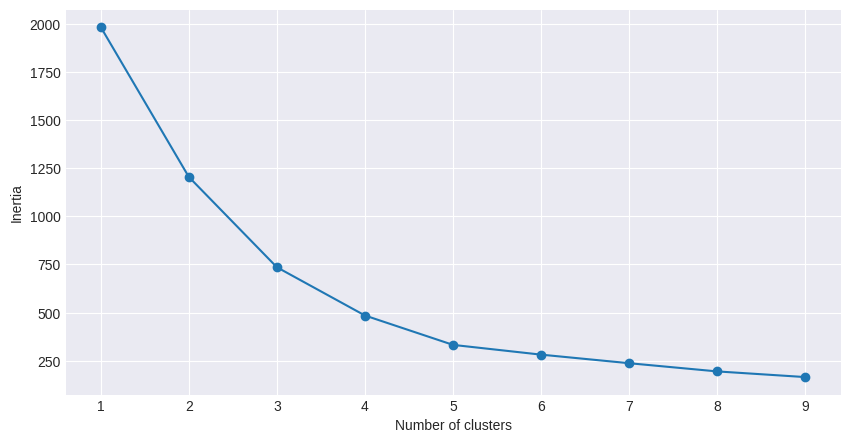

In [ ]:
optimize_k_means(set_banjir_std[['jumlah_terdampak_jiwa_T', 'ketinggian_air_T']], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

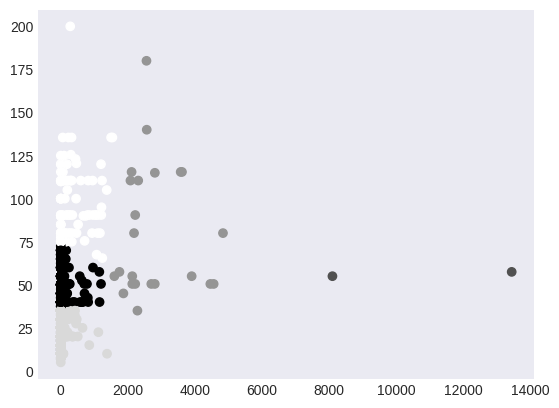

In [ ]:
# generate plot

kmeans = KMeans(n_clusters=5)
kmeans.fit(set_banjir_std[['jumlah_terdampak_jiwa_T', 'ketinggian_air_T']])

set_banjir_std['kmeans_cluster'] = kmeans.labels_

plt.scatter(x=set_banjir_std['jumlah_terdampak_jiwa'], y=set_banjir_std['ketinggian_air'], c=set_banjir_std['kmeans_cluster'])
plt.show

5. Tren Curah Hujan

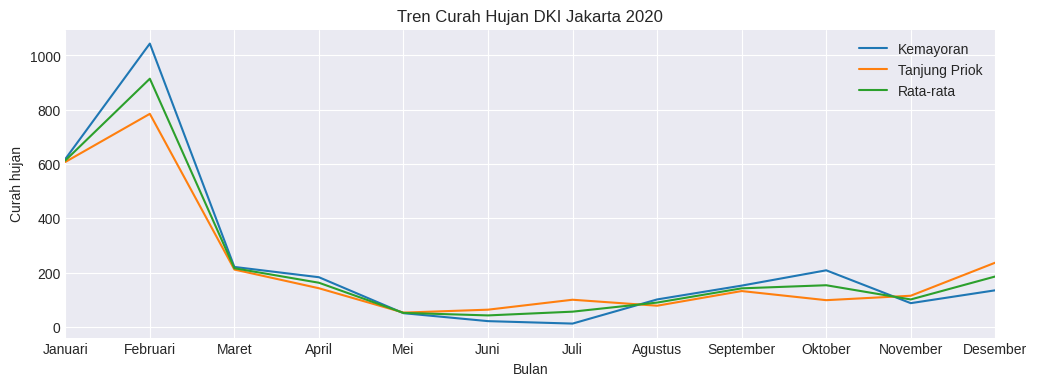

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# creating grpah plot
tren = curah_hujan_joined.transpose()
x = plt.figure(figsize = (12, 4))
plt.title('Tren Curah Hujan DKI Jakarta 2020')
plt.plot(tren.index, tren['Kemayoran'], label='Kemayoran')
plt.plot(tren.index, tren['Tanjung priok'], label='Tanjung Priok')
plt.plot(tren.index, tren['AVG'], label='Rata-rata')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('Bulan')
plt.ylabel('Curah hujan')
plt.grid()
plt.legend()
plt.show()

tren.to_csv('tren_curah_hujan.csv', encoding = 'utf-8-sig')
files.download('tren_curah_hujan.csv')

6. Tren banjir berdasarkan bulan

In [ ]:
# Generating avg val
banjir_AVG = banjir_by_month.transpose()
banjir_AVG['AVG'] = banjir_AVG.mean(axis=1)

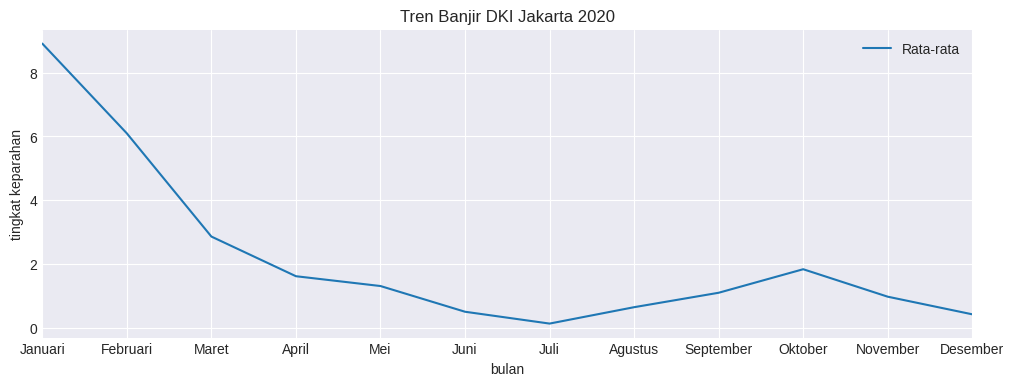

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# creating grpah plot
x = plt.figure(figsize = (12, 4))
plt.title('Tren Banjir DKI Jakarta 2020')
plt.plot(banjir_AVG.index, banjir_AVG['AVG'], label='Rata-rata')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('bulan')
plt.ylabel('tingkat keparahan')
plt.legend()
plt.grid()
plt.show()

banjir_AVG.to_csv('tren_banjir.csv', encoding = 'utf-8-sig')
files.download('tren_banjir.csv')

7. Tren Pemakaian Air Tanah Berdasarkan Bulan

In [ ]:
# Generating avg value
at_AVG = at_by_month.transpose()
at_AVG['AVG'] = at_AVG.mean(axis=1)

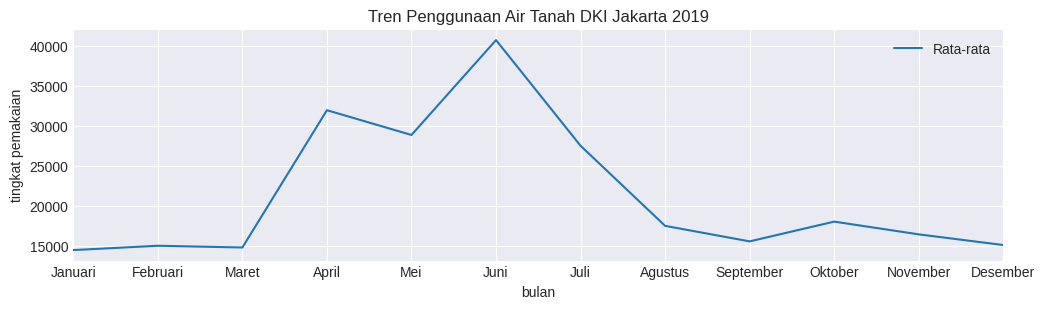

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# creating grpah plot
x = plt.figure(figsize = (12, 3))
plt.title('Tren Penggunaan Air Tanah DKI Jakarta 2019')
plt.plot(at_AVG.index, at_AVG['AVG'], label='Rata-rata')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('bulan')
plt.ylabel('tingkat pemakaian')
plt.legend()
plt.grid()
plt.show()

at_AVG.to_csv('tren_air_tanah.csv', encoding = 'utf-8-sig')
files.download('tren_air_tanah.csv')

8. Banjir, Pemakaian Air Tanah, dan Curah Hujan Berdasarkan bulan

In [ ]:
# combine dataframe
combine_month = tren.copy()
combine_month = combine_month.rename_axis(columns=None)
combine_month = combine_month.drop(columns=['Kemayoran', 'Tanjung priok'])
combine_month = combine_month.rename(columns={'AVG':'Curah hujan'})
combine_month['Banjir'] = banjir_AVG['AVG']
combine_month['Pemakaian Air Tanah'] = at_AVG['AVG']

In [ ]:
# scaling
combine_month['Curah hujan'] = combine_month['Curah hujan'].astype(float)
a_max = combine_month['Curah hujan'].max()
b_max = combine_month['Banjir'].max()
c_max = combine_month['Pemakaian Air Tanah'].max()
combine_month = combine_month.fillna(0)
for i in range(12):
  combine_month['Curah hujan'][i] = (combine_month['Curah hujan'][i]/a_max)*100
  combine_month['Banjir'][i] = (combine_month['Banjir'][i]/b_max)*100
  combine_month['Pemakaian Air Tanah'][i] = (combine_month['Pemakaian Air Tanah'][i]/c_max)*100
combine_month.round(2)

,Curah hujan,Banjir,Pemakaian Air Tanah
Januari,67.04,100.00,35.57
Februari,100.00,68.38,36.90
Maret,23.63,32.04,36.36
April,17.78,18.07,78.48
Mei,5.63,14.61,70.89
Juni,4.62,5.56,100.00
Juli,6.13,1.39,67.58
Agustus,9.79,7.16,43.00
September,15.53,12.24,38.24
Oktober,16.78,20.53,44.30


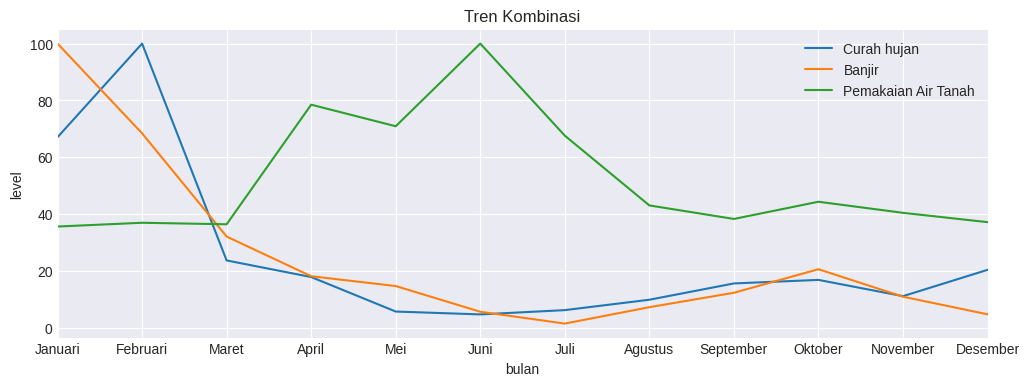

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# creating grpah plot
x = plt.figure(figsize = (12, 4))
plt.title('Tren Kombinasi')
plt.plot(combine_month.index, combine_month['Curah hujan'], label='Curah hujan')
plt.plot(combine_month.index, combine_month['Banjir'], label='Banjir')
plt.plot(combine_month.index, combine_month['Pemakaian Air Tanah'], label='Pemakaian Air Tanah')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('bulan')
plt.ylabel('level')
plt.legend()
plt.grid()
plt.show()


combine_month.to_csv('tren_gabungan.csv', encoding = 'utf-8-sig')
files.download('tren_gabungan.csv')

9. Tren Banjir Berdasarkan Kecamatan

In [ ]:
# generating avg value
banjir_kecamatan = banjir_by_month.copy()
banjir_kecamatan['AVG'] = banjir_kecamatan.mean(axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

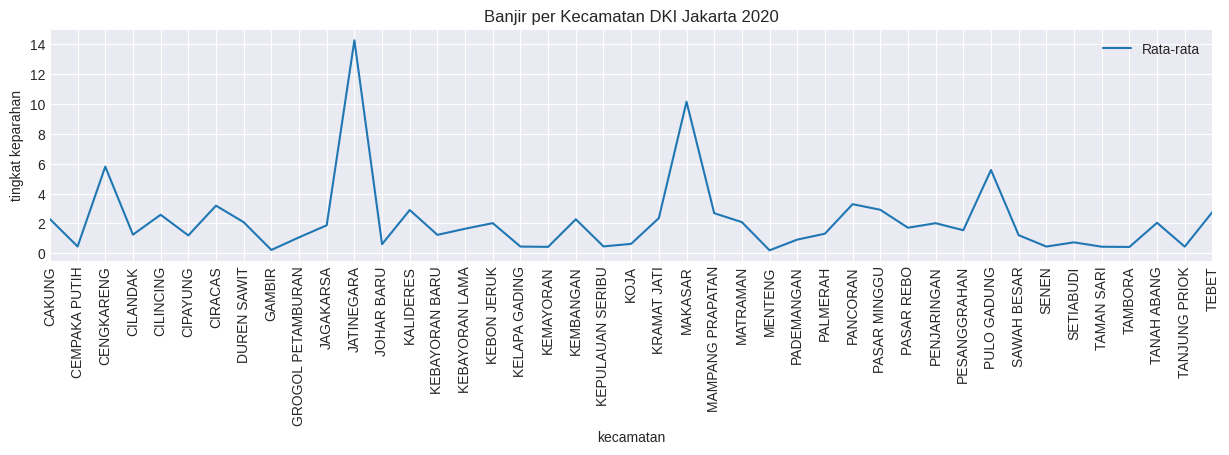

In [ ]:
# creating graph plot
x = plt.figure(figsize = (15, 3))
plt.title('Banjir per Kecamatan DKI Jakarta 2020')
plt.plot(banjir_kecamatan.index, banjir_kecamatan['AVG'], label='Rata-rata')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('kecamatan')
plt.xticks(rotation=90)
plt.ylabel('tingkat keparahan')
plt.grid()
plt.legend()
plt.show

banjir_kecamatan.to_csv('banjir_kecamatan.csv', encoding = 'utf-8-sig')
files.download('banjir_kecamatan.csv')

10. Tren Air Tanah Berdasarkan Kecamatan

In [ ]:
# generating avg value
at_kecamatan = at_by_month.copy()
at_kecamatan['AVG'] = at_kecamatan.mean(axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

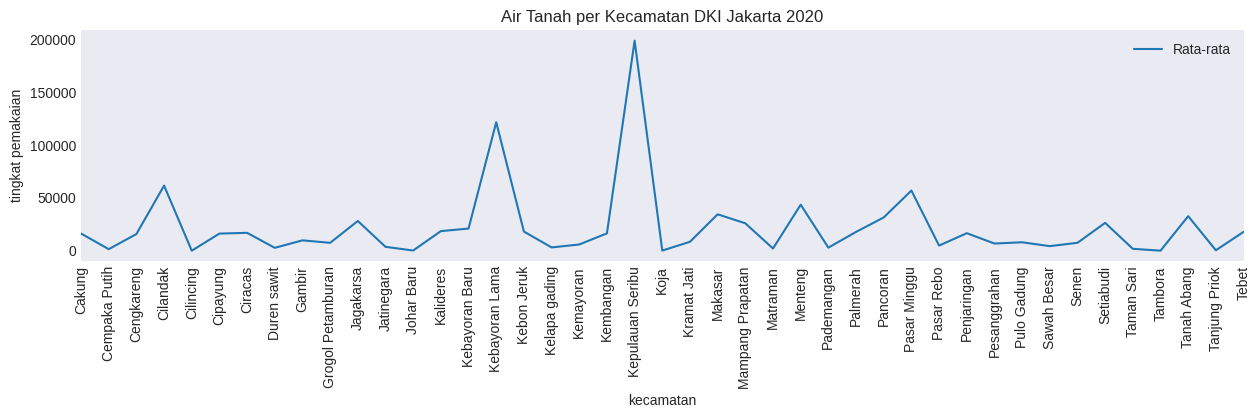

In [ ]:
# creating graph plot
x = plt.figure(figsize = (15, 3))
plt.title('Air Tanah per Kecamatan DKI Jakarta 2020')
plt.plot(at_kecamatan.index, at_kecamatan['AVG'], label='Rata-rata')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlabel('kecamatan')
plt.xticks(rotation=90)
plt.ylabel('tingkat pemakaian')
plt.legend()
plt.grid
plt.show

at_kecamatan.to_csv('at_kecamatan.csv', encoding = 'utf-8-sig')
files.download('at_kecamatan.csv')

11. Mencari korelasi

In [ ]:
at_by_month.index = at_by_month.index.str.upper()

In [ ]:
at_by_month

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
Kecamatan,,,,,,,,,,,,
CAKUNG,9340.0,11584.0,15516.0,14041.0,9004.0,17616.0,19271.0,22507.0,10436.0,19410.0,26448.0,19563.0
CEMPAKA PUTIH,938.0,1182.0,737.0,1205.0,575.0,2205.0,1319.0,1744.0,2008.0,1893.0,1910.0,1619.0
CENGKARENG,21796.0,16848.0,14660.0,16409.0,12312.0,14162.0,12355.0,16897.0,12612.0,15786.0,18081.0,16987.0
CILANDAK,79314.0,94874.0,57781.0,58337.0,34443.0,67306.0,51807.0,69707.0,46722.0,79259.0,47425.0,51292.0
CILINCING,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CIPAYUNG,18476.0,15422.0,12137.0,12524.0,11249.0,11130.0,19441.0,17537.0,18376.0,19814.0,19614.0,18478.0
CIRACAS,12926.0,9677.0,8055.0,9054.0,15822.0,15732.0,15894.0,16954.0,15945.0,32427.0,32277.0,17854.0
DUREN SAWIT,2648.0,2649.0,2141.0,2998.0,2685.0,2685.0,2448.0,2448.0,3017.0,1995.0,3420.0,3420.0
GAMBIR,8077.0,8103.0,6795.0,7675.0,7856.0,12242.0,12724.0,17778.0,9007.0,9107.0,9135.0,9007.0


In [ ]:
kec_banjir_at = banjir_by_month.corrwith(at_by_month, axis = 1)
kec_banjir_at["CILINCING"] = 0
kec_banjir_at


kecamatan
CAKUNG              -0.435227
CEMPAKA PUTIH        0.090873
CENGKARENG           0.717272
CILANDAK             0.444636
CILINCING            0.000000
CIPAYUNG            -0.451233
CIRACAS             -0.260557
DUREN SAWIT         -0.129740
GAMBIR              -0.173407
GROGOL PETAMBURAN    0.174966
JAGAKARSA            0.224415
JATINEGARA          -0.203724
JOHAR BARU           0.035577
KALIDERES           -0.213927
KEBAYORAN BARU      -0.132561
KEBAYORAN LAMA      -0.223840
KEBON JERUK         -0.158922
KELAPA GADING       -0.069250
KEMAYORAN           -0.273355
KEMBANGAN           -0.344648
KEPULAUAN SERIBU     0.650780
KOJA                -0.107002
KRAMAT JATI          0.280110
MAKASAR              0.041357
MAMPANG PRAPATAN    -0.042308
MATRAMAN            -0.214236
MENTENG             -0.493312
PADEMANGAN           0.431324
PALMERAH            -0.175088
PANCORAN            -0.203774
PASAR MINGGU         0.213039
PASAR REBO           0.343740
PENJARINGAN          0.357861


In [ ]:
corr1_mean = kec_banjir_at.mean()
corr1_mean

-0.039597062826010505

In [ ]:
bulan_banjir_at = banjir_by_month.corrwith(at_by_month, axis = 0)
bulan_banjir_at

Januari      0.107927
Februari     0.022825
Maret        0.057686
April       -0.042420
Mei         -0.051606
Juni         0.283156
Juli        -0.049057
Agustus      0.196236
September    0.198404
Oktober      0.169344
November     0.099654
Desember     0.070477
dtype: float64

In [ ]:
corr2_mean = bulan_banjir_at.mean()
corr2_mean

0.0885522295442313

- korelasi antara banjir dan air tanah berdasarkan kecamatan (-0.03959) berarti *very low negative correlation*.
- korelasi antara banjir dan air tanah berdasarkan bulan (0.08855) berarti *very low positive correlation*.

In [ ]:
combine_month.corr()

,Curah hujan,Banjir,Pemakaian Air Tanah
Curah hujan,1.000000,0.866534,-0.451045
Banjir,0.866534,1.000000,-0.405106
Pemakaian Air Tanah,-0.451045,-0.405106,1.000000


In [ ]:
combine_month.to_csv('combine_month.csv', encoding = 'utf-8-sig')
files.download('combine_month.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- korelasi antara banjir dan curah hujan berdasarkan bulan (0.8665) berarti *high positive corelation*.
- korelasi antara banjir dan pemakaian air tanah berdasarkan bulan (-0.4051) berarti *low negative corelation*.

**Predictive Modeling**

In [ ]:
set_banjir_AVG_bulan

,bulan,jumlah_terdampak_jiwa,ketinggian_air
0,Agustus,0.000000,23.333333
1,April,59.320000,32.050000
2,Desember,22.702128,28.085106
3,Februari,260.263473,38.338323
4,Januari,553.960000,71.620000
5,Juli,0.000000,30.000000
6,Juni,20.000000,28.906250
7,Maret,210.586957,42.173913
8,Mei,135.521739,53.695652
9,November,0.000000,20.589888


In [ ]:
# Construct new dataset
curah_hujan_pred = curah_hujan_joined.transpose()
pred = set_banjir_AVG_bulan.copy()
curah_hujan_AVG_pred = curah_hujan_pred['AVG'].reset_index(drop=True)
pred = pred.join(curah_hujan_AVG_pred)
pred = pred.round(2)
pred = pred.set_index('bulan')
pred = pred.rename_axis(index=None)
pred

,jumlah_terdampak_jiwa,ketinggian_air,AVG
Agustus,0.00,23.33,612.60
April,59.32,32.05,913.85
Desember,22.70,28.09,215.90
Februari,260.26,38.34,162.50
Januari,553.96,71.62,51.45
Juli,0.00,30.00,42.20
Juni,20.00,28.91,56.00
Maret,210.59,42.17,89.45
Mei,135.52,53.70,141.90
November,0.00,20.59,153.30


In [ ]:
# calculate prediction for ketinggian air
train = pred.drop(['ketinggian_air', 'jumlah_terdampak_jiwa'], axis=1)
test = pred['ketinggian_air']
X_train, X_test, y_train, y_test = train_test_split(train, test,test_size = 0.7, random_state=2)
regr = LinearRegression()
regr.fit(X_train, y_train)
ketinggian_air_pred = regr.predict(X_test)
print(ketinggian_air_pred)

[ 42.33048806  31.80003427  32.67678222  36.27855759 114.41812648
  37.36856856  85.86457829  43.20249683  48.26393907]


In [ ]:
# train = pred.drop(['ketinggian_air', 'jumlah_terdampak_jiwa'], axis=1)
# test = pred['jumlah_terdampak_jiwa']
# X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2, shuffle=False)
# regr = LinearRegression()
# regr.fit(X_train, y_train)
# ketinggian_air_pred = regr.predict(X_test)

In [ ]:
train = pred.drop(['ketinggian_air', 'jumlah_terdampak_jiwa'], axis=1)
test = pred['jumlah_terdampak_jiwa']

regr = LinearRegression()
regr.fit(X_train, y_train)

ketinggian_air_pred = regr.predict(test)
print(ketinggian_air_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
y_test

In [ ]:
X_test

In [ ]:
X_train

In [ ]:

y_train

In [ ]:
y_test

In [ ]:
pred